# Utils
## Base functions

In [1]:
def identity(x):
  return x

## Image utils

Please install : py-opencv

### Read & display images

In [2]:
# imread read images in RGB
from imageio import imread

def img_read(img_path):
    return imread(img_path)

In [3]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html
import numpy as np
import cv2

# cv2 read images in BGR
def img_read_cv(img_path):
    # cv2.IMREAD_UNCHANGED (-1) | cv2.IMREAD_GRAYSCALE (0) | cv2.IMREAD_COLOR (default : 1)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    return img

# change BGR to RGB
def to_rgb_cv(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [4]:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html
from matplotlib import pyplot as plt

def img_show(img, func=identity):
    plt.imshow(func(img))
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

# Tests

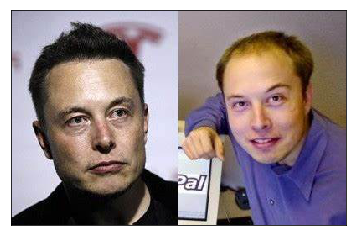

In [5]:
img_path = '../data/faces/elon_musk.jpeg'

img = img_read_cv(img_path)
img = to_rgb_cv(img)
img_show(img)